In [1]:
from config.configuration import RunDetails

# runDetail = RunDetails('config.yml', 'GitLab-training-data')
runDetail = RunDetails('config.yml', 'ASVspoof-2019_training')
# runDetail = RunDetails('config.yml', 'ASVspoof-2019_training_epoch-100')

notebookName = 'audio-deepfake-detection-training'
plot_title_suffix = "(Training)"

In [2]:
configFilename = runDetail.configFilename
runJobId = runDetail.jobId

In [ ]:
import config.configuration as configuration
import model_definitions.model_cnn_definition as model_cnn_definition
from postprocessors.plot_confusion_matrix import PlotConfusionMatrix
from postprocessors.plot_precision_recall_curve import PlotPrecisionRecallCurve
from postprocessors.plot_roc_curve import PlotRocCurve
from preprocessors.abstract_preprocessor import AbstractPreprocessor
from preprocessors.preprocessor_factory import PreprocessorFactory
from notebook_utils import notebookToPython
from processors.basic_model_training_processor import BasicModelTrainingProcessor
from processors.basic_model_evaluation_processor import BasicModelEvaluationProcessor

In [15]:
config = configuration.ConfigLoader(configFilename)

notebookToPython(notebookName)
job = config.getJobConfig(runJobId)

if (job.newModelGenerated == False):
    raise ValueError("This notebook is meant for training. Select a job without a value for 'persisted-model' set.")

Write python file
Generating new model name: output/ASVspoof-2019_training_2025-04-18T11-16-10.997821.libjob
Assigned model name: output/ASVspoof-2019_training_2025-04-18T11-16-10.997821.libjob


In [5]:
preproc_factory = PreprocessorFactory()
preprocessor: AbstractPreprocessor = preproc_factory.newPreprocessor(job.preprocessor)

MelSpectrogramPreprocessor


In [6]:
X, y_encoded = preprocessor.extract_features_multipleSource(job, job.dataPathSuffix)

Loading C:/Users/tubas/workspace/Deepfake/data/ASVspoof-2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt...
fullDataPath: C:/Users/tubas/workspace/Deepfake/data/ASVspoof-2019/LA/ASVspoof2019_LA_train/flac
Loading audio files: 1269
Loading audio files: 2538
Loading audio files: 3807
Loading audio files: 5076
Loading audio files: 6345
Loading audio files: 7614
Loading audio files: 8883
Loading audio files: 10152
Loading audio files: 11421
Loading audio files: 12690
Loading audio files: 13959
Loading audio files: 15228
Loading audio files: 16497
Loading audio files: 17766
Loading audio files: 19035
Loading audio files: 20304
Loading audio files: 21573
Loading audio files: 22842
Loading audio files: 24111
Loading audio files: 25380
Number of audio files load: 25380


In [7]:
trainingProc = BasicModelTrainingProcessor(job, model_cnn_definition.ModelCnnDefinition)
model, X_train, X_test, y_train, y_test, cross_validation_scores = trainingProc.process(X, y_encoded, 1)

Selecting training and test data - traininSplitRandomState: 186
Training using 20304 files.
__job__: <config.configuration.Job object at 0x00000147C1F7A3F0>
Training the Model...
Epoch 1/10
635/635 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.8826 - loss: 8.6734 - val_accuracy: 0.8999 - val_loss: 0.2546
Epoch 2/10
635/635 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9058 - loss: 0.2486 - val_accuracy: 0.9243 - val_loss: 0.1862
Epoch 3/10
635/635 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9307 - loss: 0.1790 - val_accuracy: 0.9452 - val_loss: 0.1159
Epoch 4/10
635/635 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9546 - loss: 0.1197 - val_accuracy: 0.9712 - val_loss: 0.0752
Epoch 5/10
635/635 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.9708 - loss: 0.0771 - val_accuracy: 0.9770 - val_loss: 0.0568
Epoch 6/10
635/635 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9765 - loss: 0.0673 - val_accuracy: 0.9789 - val_loss: 0.0603
Epoch 7/10
635/635 ━━━━━━━━━━━━━━━━━━━━ 4

### Test Model

In [8]:
evaluationProc = BasicModelEvaluationProcessor(job, model)
results = evaluationProc.process(X_test, y_test, cross_validation_scores)
print(f"{results.reportSnaphot()}")


159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
  Batches: 5076 - Files: 5076 - Accuracy Score: 0.9761623325453113 - Elements: 5076
  --- Results (start) ---
+-------------------------+---------------------------------------------------------------------------------------+
| Key                     | Value                                                                                 |
+-------------------------+---------------------------------------------------------------------------------------+
| batchId                 | 1                                                                                     |
| timestamp_utc           | 2025-04-18 16:06:54.024901+00:00                                                      |
| cross_validation_scores | { 'fit_time': array([360.83280706, 315.0582552 , 308.02894378, 300.91984248,          |
|                         |        299.54650092]),                                                                |
|                         |   'score

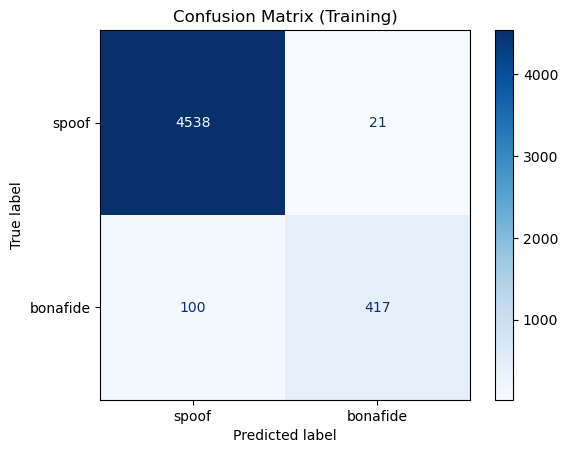

In [9]:
CM_TITLE = f"{PlotConfusionMatrix.DEFAULT_TITLE} {plot_title_suffix}"
cm_plot = PlotConfusionMatrix()
cm_plot.plotFromResults(results, job, CM_TITLE)


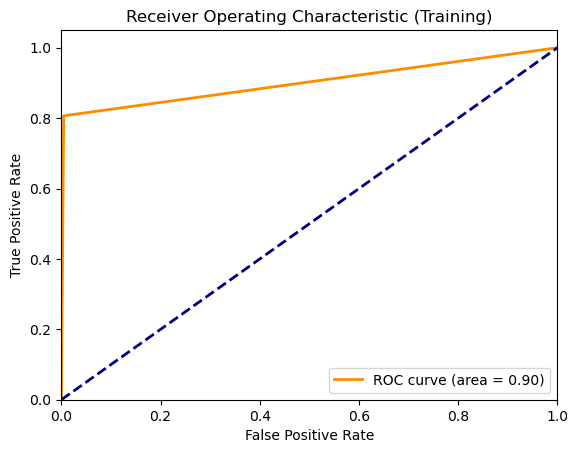

In [10]:
RC_TITLE = f"{PlotRocCurve.DEFAULT_TITLE} {plot_title_suffix}"
roc_plot = PlotRocCurve()
roc_plot.plotFromResults(results, RC_TITLE)

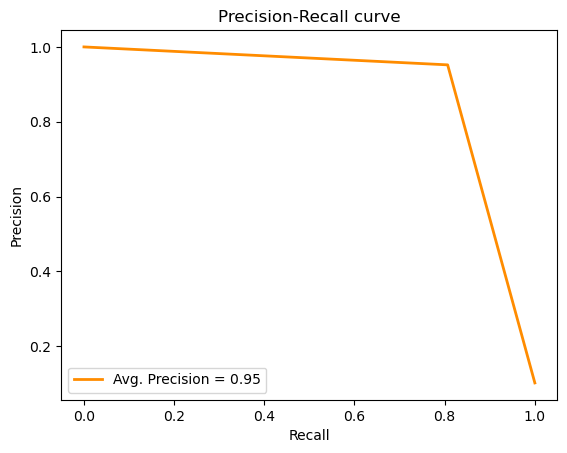

In [ ]:
PP_TITLE = f"{PlotPrecisionRecallCurve.DEFAULT_TITLE} {plot_title_suffix}"
roc_plot = PlotPrecisionRecallCurve()
roc_plot.plotFromResults(results, PP_TITLE)

In [11]:
print("\n")
report = evaluationProc.reportSnapshot(trainingProc)
evaluationProc.writeReportToFile(job.persistedModelResults, report)

print(report)

---- Training (start) ----
start time: 2025-04-18T15:32:49.785277+00:00
end time: 2025-04-18T16:06:54.295103+00:00
elapsed: 0:34:04.509826

model file: output/ASVspoof-2019_training_2025-04-18T10-25-30.270494.libjob
batch count: 0
file count: 0
job: {
    "jobId": "ASVspoof-2019_training",
    "inputFileBatchSize": null,
    "outputFolder": "output",
    "dataPathRootRaw": "$HOMEDRIVE$HOMEPATH/workspace/Deepfake/data/ASVspoof-2019",
    "dataPathRoot": "C:/Users/tubas/workspace/Deepfake/data/ASVspoof-2019",
    "dataPathSuffix": "LA/ASVspoof2019_LA_train/flac",
    "dataExtension": ".flac",
    "trainingSplitRandomState": 186,
    "labelFilename": "LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt",
    "executeToCategoricalForLabels": true,
    "classes": [
        "spoof",
        "bonafide"
    ],
    "numClasses": 2,
    "sampleRate": 16000,
    "duration": 5,
    "numMels": 128,
    "maxTimeSteps": 109,
    "kernelSize": [
        2,
        2
    ],
    "poolSize":